# LAB 05 : Implementation of Neural networks

**Full Name** : Azamat ZULPYKHAR

## I- Implementation of a Neural Network and its Algorithms
- We will use this example to check the realization
- In this computational graph,  we adopt the following notations :
    - $a_i^{(L)}$ : The acctivation score at i'th *node* of the L'th *layer* (Where $a_1^{(1)}$ of the input layer is the value of the 1'st feature of an arbitrary example from the set X of all instances ).
    - $Z_i^{(L)} = {W^{(L)}}^{T} * a^{(L-1)}+ b^{(L)}$ : The linear sum at the **L'th layer**.
    - Where $b^{(L)}$ : the bias (learned or initialized) at the **L'th layer**.  
    - $f_i^{(L)}$ : is the activation function applied at the **L'th layer**.
    - Also , $a_i^{(L)}= f_i^{(L)}(Z_i^{(L)})$ 
    - $Y_i$ : the label of the i'th training example.
    - $J$ : Loss function 


![exemple](RNPA-exp.png)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import colors
%matplotlib inline

Here we define an API (a kind of interface) for the activation functions and the cost functions. 

In [2]:
# API
class Activation(object): 
    # Calculate the activation based on Z (the linear sum)
    def activate(self, Z):
        pass
    # Calculate the derivative based on Z and the activation A
    # The activation value in the last layer (prediction node) 
    # is equal the prediction or hypothesis value, thus H
    def derive(self, Z, H):
        pass

# API
class Cost(object): 
    # Calculate the activation based on Z (the linear sum)
    def calculate(self, H, Y):
        pass
    # Calculate the derivative based on Z and the activation A (H: hypothesis or predicted value)
    def derive(self, H, Y):
        pass

### I.1 The activation functions
In the following jupyter cells, we will implement the following two activation functions ($\sigma_1$ and $\sigma_2$): 
- The **Logistic activation function** 
    - It is calculated as follows : 
$$A = \sigma_1(Z) = \frac{1}{1+e^{-Z}}$$
    - It's partial derivative is given by :
$$\frac{\partial \sigma_1(Z)}{\partial \theta} = \sigma_1(Z) (1-\sigma_1(Z))$$
-  The **Hyperbolic tangent (tanh) activation function** :
    - It is calculated as follows : 
$$A = \sigma_2(Z) = \frac{e^Z - e^{-Z}}{e^Z + e^{-Z}}$$
    - It's partial derivative is given by : 
$$\frac{\partial \sigma_2(Z)}{\partial \theta} = 1-\sigma_2(Z)^2$$

In [3]:
import math 

# TODO perform the derivative of the logistic activation function

def sigmaf(Z):
    ### CODE 01 ###
    
    ### BEGIN : Write your code here
    
    numerator = 1
    
    denominator =1 + np.exp(-Z)
    
    ### END
    return numerator/ denominator

def d_sigmaf(Z, A): 
    ### CODE 02 ###
    
    ### BEGIN : Write your code here
    
    activation = A
    
    result = activation * (1-activation)
    
    ### END
    
    return result

# TODO perform the derivative of the "tanh" activation function

def tanhf(Z):
    ### CODE 03 ###
    
    ### BEGIN : Write your code here
    
    numerator = np.exp(Z)-np.exp(-Z)
    
    denominator = np.exp(Z)+np.exp(-Z)
    
    ### END
    
    return numerator/ denominator

def d_tnahf(Z, A): 
    ### CODE 04 ###
    
    ### BEGIN : Write your code here
    
    result = 1-A**2
    
    ### END
    
    return result

# Create the logitic and tanh classes following the API we defined 
class Logistic(Activation):
    def activate(self, Z):
        return sigmaf(Z)
    def derive(self, Z, H):
        return d_sigmaf(Z, H)

class Tanh(Activation):
    def activate(self, Z):
        return tanhf(Z)
    def derive(self, Z, H):
        return d_tnahf(Z, H)

In [4]:
#=====================================================================
# UNIT TESTING (Run the cell and compare your results)
#=====================================================================
# Results :
#
# the z 1st value in the 4th layer : [1.666 1.68 ]
#
# The logistic activation function :
#
# - Logistic(z4_1) =  [0.84104179 0.84290453]
# - d_Logistic(z4_1,a4_1) =  [0.1336905  0.13241648]
#
# The tanh activation function :
#
# - tanh(z) =  [0.93102086 0.93286155]
# - d_tanh(z4_1,a4_1) =  [0.13320015 0.12976932]
#
#---------------------------------------------------------------------

logitic = Logistic()
tanh = Tanh()
# Let's take the Z value of the 1st node of the 4th layer z4_1: [1.666, 1.68]
z4_1 = np.array([1.666, 1.68])

# Calculate the activation function (Logistic) and its derivation on z4_1 
logistic_a4_1 = logitic.activate(z4_1)
logisticDerivative_a4_1 = logitic.derive(z4_1, logistic_a4_1)

# Calculate the activation function (tanh) and its derivation on the following array 
tanh_a4_1 = tanh.activate(z4_1)
tanhDerivative_a4_1 = tanh.derive(z4_1, tanh_a4_1)

print("the z 1st value in the 4th layer :", z4_1)
print("\nThe logistic activation function :\n")
print('- Logistic(z4_1) = ',logistic_a4_1) 
print('- d_Logistic(z4_1,a4_1) = ',logisticDerivative_a4_1)
print("\nThe tanh activation function :\n")
print('- tanh(z) = ',tanh_a4_1) 
print('- d_tanh(z4_1,a4_1) = ',tanhDerivative_a4_1)

the z 1st value in the 4th layer : [1.666 1.68 ]

The logistic activation function :

- Logistic(z4_1) =  [0.84104179 0.84290453]
- d_Logistic(z4_1,a4_1) =  [0.1336905  0.13241648]

The tanh activation function :

- tanh(z) =  [0.93102086 0.93286155]
- d_tanh(z4_1,a4_1) =  [0.13320015 0.12976932]


**NB :** In the example above, you can see that the results are similar to those obtained with the logistic activation function.

### I.2. The cost functions

- **Binary Cross-Entropy (BCE)**: 

    - The BCE function is calculated as :
$$BCE (H_i, Y_i)= - ( Y_i \log(H_i) + (1-Y_i) \log(1-H_i))$$

    - Its derivative is calculated as :
$$\frac{\partial BCE (H_i, Y_i)}{\partial \theta} = \frac{H_i-Y}{H_i - H_i^2}$$

Where the variables (for a given instance $X_i$):
- $H_i$ : is the hypothesis, or the prediction that the neural network made on $X_i$.
- $Y_i$ : is the true label of $X_i$. 

In [5]:
# TODO code the derivative of the BCE error function

def bce_function(H, Y):
    ### CODE 05 : BEGIN ###
    
    # Write your code here
    
    result = -(Y*np.log(H)+(1-Y)*np.log(1-H))
    
    #### CODE 05 : END ###
    
    return result 

def d_bce_function(H, Y):
    ### CODE 06 : BEGIN ###
    
    # Write your code here
    
    numerator = H-Y
    
    denominator = H-np.square(H)
    
    result = numerator/denominator
    
    #### CODE 06 : END ###
    
    return result

class BCE(Cost):
    def calculate(self, H, Y):
        return bce_function(H, Y)
    def derive(self, H, Y):
        return d_bce_function(H, Y)


In [6]:
#=====================================================================
# UNIT TESTING (Run the cell and compare your results)
#=====================================================================
# Results :
#
# Loss_BCE(H,Y) =  [1.83258146 0.17078832]
# Derivative of Loss_BCE(H,Y) =  [ 6.25       -1.18623962]
#
#---------------------------------------------------------------------

bce = BCE()

# The true labels of the two instances
Y = np.array([0., 1.])
# the predictions for the two instances , H=[H_0, H_1] for X_0 and X_1
H = np.array([0.840 , 0.843]) 

# Calculate the loss in predictions
J = bce.calculate(H, Y)

# The derivative of the loss function is useful for backpropagation. 
# It helps the optimization algorithm to rectify the weights "W^(l)".
DJ = bce.derive(H, Y)

print("Loss_BCE(H,Y) = ", J)
print("Derivative of Loss_BCE(H,Y) = ", DJ)

Loss_BCE(H,Y) =  [1.83258146 0.17078832]
Derivative of Loss_BCE(H,Y) =  [ 6.25       -1.18623962]


### I.3. Neuron

The function that updates the parameters (weights and biases) takes as input : 
- $W[Lp]$ a list of weights; a vector of size $Lp$ (the number of neurons in the previous layer).
- $b$ the bias.
- $Z[M]$ lthe linear combination of the current neuron; a vector of size $M$ (the number of samples).
- $A[M]$ the activation of the current neuron; a vector of size $M$.
- $A\_past[M, Lp]$ the activations of the neurons of the previous layer; a size matrix is $(M * Lp)$.
- $Delta\_next[M, Ln]$ the delta calculated in the next layer; a matrix of size $M * Ln$ ($Ln$ : the number of neurons in the next layer).
- $W\_next[Ln]$ the weights to the next layer; a vector of size $Ln$.
- $act$ :  it is an object of type "Activation"; it provides two methods: "act.activate" and "act.derive".
- $alpha$  : the learning rate (training step).

---------------
**Parameters updating equations :**
$$ W_i^{(L)} = W_i^{(L)} - \alpha * \frac{\partial J}{\partial w^{(L)}} $$
$$ b_i^{(L)} = b_i^{(L)} - \alpha * \frac{\partial J}{\partial b^{(L)}} $$

**The backpropagation equations (for single example):**


- $\delta^{(L)} = \frac{\partial f^{(L)}}{\partial z^{(L)}} w^{(L+1)} \delta^{(L+1)} = f'(z^{(L)})  w^{(L+1)} \delta^{(L+1)}$ : denote this by ```delta``` in code

- $\frac{\partial J}{\partial w^{(L)}} = \frac{\partial z^{(L)}}{\partial w^{(L)}} \delta^{(L)}= a^{(L-1)} \delta^{(L)}$ : denote this by ```dw``` in code

- $\frac{\partial J}{\partial b^{(L)}} = \delta^{(L)}$ : denote this by ```db``` in code

where :
- $\delta_i^{(L)}$ : is the error of i'th node in the layer L.  

NB : In the code, when we update the parameters we take the average of the gradient on all the samples. 

Check the following links (videos) for more insight on how we got the following famous 3 equations of the backpropagation : 
- [Backpropagation calculus | Chapter 4, Deep learning](https://www.youtube.com/watch?v=tIeHLnjs5U8) (**recommended**).
- [Lecture 9.2 — Neural Networks Learning | Backpropagation Algorithm — [ Machine Learning | Andrew Ng]](https://youtu.be/x_Eamf8MHwU?list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN)
- [Lecture 9.3 — Neural Networks Learning | Backpropagation Intuition — [ Machine Learning | Andrew Ng]](https://youtu.be/mOmkv5SI9hU?list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN).


Hints :
- The deltas are calculated with respect to the different outputs. 
- when we update the parameters we take the average of the gradient on all the samples. 
- The reason why we don't calculate the average only in the output layer is because we do the back-propagation for each sample. 

- I put moy() to specify that we have to take the average of the samples when we update the parameters. But, when we broadcast the gradients backwards, we treat each sample separately.

In [7]:
# TODO Implement the function that updates the weights of a neuron

def neuron_update(W, b, Z, A, A_past, Delta_next, W_next, act, alpha=1.):
    ### CODE 07 : BEGIN ###
    
    # Write your code here
    
    # get the number of sample 
    m = A.shape[0]
    
    # Use np.multiply() and np.dot() function (check the official documentation)
    # np.multiply() : for element-wise multiplication.
    # np.dot() : is for Dot product of two arrays. 
    delta = np.multiply(act.derive(Z, A), np.dot(Delta_next, W_next))
    
    # take into account all the samples 
    # use np.sum() or np.dot() to calculate the avreage of all dw and db
    dw = (1/m) * np.dot(A_past.T, delta)
    db = (1/m) * np.sum(delta)
    
    # Updating the weights
    W_new = W - alpha * dw
    b_new = b - alpha * db
    
    ### CODE 07 : END ###
    
    return W_new, b_new, delta

In [8]:
#=====================================================================
# UNIT TESTING (Run the cell and compare your results)
#=====================================================================
# Results :
# 
# Updated Weight : [0.49375218 0.2046736 ]
# Updated bias : -0.30324311474187016
# Delta error propagation : [ 0.00696306 -0.00047683]
# 
#---------------------------------------------------------------------

W_t = np.array([0.5, 0.2])
b_t = -0.3
Z_t = np.array([0.5, 2.2])

# M (the current activation)
A_t = np.array([0.62245933, 0.90024951])

# M * L (the activations of the previous layer)
A_past_t = np.array([[2., -1.], 
                     [3., 5.]])

# L
Delta_next_t = np.array([[ 0.14523862, -0.02613822], 
                         [ 0.1394202, -0.02531591]]).T
W_next_t = np.array([0.3, -0.1])

# Set Logistic function as the activation function
act = Logistic() 

W_new, b_new, Delta_new = neuron_update(W_t, b_t, Z_t, A_t, A_past_t, Delta_next_t, W_next_t, act, alpha=1.)

print("Updated Weight :",W_new)
print("Updated bias :",b_new) 
print("Delta error propagation :",Delta_new)

Updated Weight : [0.49375218 0.2046736 ]
Updated bias : -0.30324311474187016
Delta error propagation : [ 0.00696306 -0.00047683]


In [9]:
class Neuron(object):
    def __init__(self, input_shape, activation=Logistic()):
        # Initialize the parameters to zero 
        self.w = np.array([0.] * input_shape)
        self.b = 0.
        # Set the activation function
        self.act = activation
        
    def randomize(self):
        self.w = np.random.rand(len(self.w))
        self.b = np.random.rand(1)[0]
        
    def __aggregate(self, X):
        # Calculate Z, the linear sum
        return np.dot(X, self.w) + self.b
    
    def activate(self, X):
        self.a_past = X
        self.z = self.__aggregate(X)
        self.a = self.act.activate(self.z)
        return self.a
    
    def update(self, delta_next, w_next, alpha=1.):
        w_previous = self.w.copy()
        self.w, self.b, delta = neuron_update(self.w, self.b, self.z, self.a, self.a_past, 
                                              delta_next, w_next, self.act, alpha=alpha)
        return delta, w_previous


In [10]:
#=====================================================================
# UNIT TESTING (Run the cell and compare your results)
#=====================================================================
# Results :
#
# z2_1 = [0.5 2.2]
# a2_1 = [0.62245933 0.90024951]
# derive(a2_1) = [0.23500371 0.08980033]
# previous b = -0.3
# previous w = [0.5 0.2]
# delta2 = [ 0.00696306 -0.00047683]
# updated b = -0.30324311473938026
# updated w = [0.49375218 0.2046736 ]
#
#---------------------------------------------------------------------

# Creation of a neuron with two inputs
n = Neuron(2)
# ---------------------
# We don't have to assign the weights directly 
# Here, it's just to have the same weights of the output neuron in the example

# We will reproduce the parameters of the neuron 1 hidden layer 1 (layer 2)
n.b = -0.3
n.w = np.array([0.5, 0.2])
# ---------------------

# M x Lp (here it is X : input layer)
A1 = np.array([[2., -1.], [3., 5.]])
# M x Ln (Delta of the next layer)
Delta3 = np.array([[ 0.14523862, -0.02613822], [ 0.1394202, -0.02531591]]).T
W3_1 = np.array([0.3, -0.1])


A2_1 = n.activate(A1)
print("z2_1 = " + str(n.z))
print("a2_1 = " + str(A2_1))

# the derivative of the logistic function does not need z, so we pass 0
print("derive(a2_1) = " + str(n.act.derive(0,A2_1)))
print("previous b = " + str(n.b))

Delta2, W2_previous = n.update(Delta3, W3_1) 

print("previous w = " + str(W2_previous))
print("delta2 = " + str(Delta2))
print("updated b = " + str(n.b))
print("updated w = " + str(n.w))

z2_1 = [0.5 2.2]
a2_1 = [0.62245933 0.90024951]
derive(a2_1) = [0.23500371 0.08980033]
previous b = -0.3
previous w = [0.5 0.2]
delta2 = [ 0.00696306 -0.00047683]
updated b = -0.30324311473938026
updated w = [0.49375218 0.2046736 ]


### I.4. Neural Network : The Layer

**Nothing to code here.**

- Here we code a class that defines a layer by indicating :
    - The number of neurons (size)
    - The number of these inputs 
    - The activation function of these neurons.
    
    
- This class includes 3 methods : 
    1. initializer : to initialize the parameters (weights and biases) of the neurons in a random way.
    2. forwardPass :to apply the forward propagation.
    3. backPass : to apply the backpropagation.

In [11]:
class Layer(object):
    
    def __init__(self, units, input_shape, activation=Logistic()):
        self.neurons = [Neuron(input_shape, activation=activation) for i in range(units)]
        
    def randomize(self):
        for neuron in self.neurons:
            neuron.randomiser()

    def forward_propagation(self, X):
        activations = []
        for neuron in self.neurons:
            activations.append(neuron.activate(X))
        return np.array(activations).T
    
    def back_propagation(self, delta_next, W_next, alpha=1.):
        W_previous = []
        Deltas = []
        for i, neuron in enumerate(self.neurons):
            delta, w_previous = neuron.update(delta_next, W_next[i], alpha=alpha)
            W_previous.append(w_previous)
            Deltas.append(delta)
        return np.array(Deltas).T, np.array(W_previous).T

In [12]:
#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# activations : [[0.62245933 0.66818777]
#  [0.90024951 0.96770454]]
# deltas : [[ 0.00696306  0.00682726]
#  [-0.00047683 -0.00017109]]
#---------------------------------------------------------------------

# Layer 2
c2 = Layer(2, 2)

# We don't have to assign the weights directly 
# Here, it's just to have the same weights of the output neuron in the course example
c2.neurons[0].b = -0.3
c2.neurons[0].w = np.array([0.5, 0.2])
c2.neurons[1].b = 0.5
c2.neurons[1].w = np.array([0.3, 0.4])

a2 = np.array([[2., -1.], [3., 5.]])

# L
delta3 = np.array([[ 0.14523862, -0.02613822], [ 0.1394202, -0.02531591]]).T
w3 = np.array([[0.3, -0.1],[0.5, -0.3]])

# M x Lp (here it is X : input layer)
a1 = np.array([[2., -1.], [3., 5.]])
a2 = c2.forward_propagation(a1)
print("activations : " + str(a2))

Deltas2, W_anciens2 = c2.back_propagation(delta3, w3)

print("deltas : " + str(Deltas2))

activations : [[0.62245933 0.66818777]
 [0.90024951 0.96770454]]
deltas : [[ 0.00696306  0.00682726]
 [-0.00047683 -0.00017109]]


### I.5. The Neural Network : Build The Network

In [13]:
class NeuralNetwork(object):
    
    def __init__(self, output_shape, cost=bce, alpha=1.):
        # The size of the last layer
        self.current_shape = output_shape 
        # object of type Cost to calculate the cost and its derivative
        self.cost = cost 
        self.alpha = alpha
        self.layers = []

    def add_layer(self, units, activation=Logistic()):
        new_layer = Layer(units, self.current_shape, activation=activation)
        self.layers.append(new_layer)
        self.current_shape = units
        
    def randomize(self):
        for layer in self.layers:
            layer.randomize()
    
    def predict(self, X): 
        Y = X
        if self.norm:
            Y = np.where(self.std==0, X, (X - self.mean)/self.std)
            
        for layer in self.layers:
            Y = layer.forward_propagation(Y)
        if Y.ndim == 2 and Y.shape[1] == 1:
            Y = Y.flatten()
        return np.where(Y < 0.5, 0, 1)
    
    
    def _do_iteration(self, X, Y):
        # 1- Do forward propagation
        a = X
        for layer in self.layers:
            a = layer.forward_propagation(a)
            
        # 2- calculation of the cost and its derivative 
        YY = np.array(Y)
        if YY.ndim < 2 : 
            YY = YY[:, np.newaxis]
        J = np.mean(self.cost.calculate(a, YY))
        J_prime = self.cost.derive(a, YY)
        
        # 3- Do back propagation 
        w_past = np.array([[1.] * self.current_shape])
        delta_past = J_prime
        # we start from the last layer to the first one
        for layer in reversed(self.layers): 
            delta_past, w_past = layer.back_propagation(delta_past, w_past)
        return J
    
    def train(self, X, Y, nbr_it=100, norm=False):
        costs = []
        X_norm = X
        self.norm = norm
        if norm:
            self.mean = np.mean(X, axis=0)
            self.std = np.std(X, axis=0)
            X_norm = np.where(self.std==0, X, (X - self.mean)/self.std)

        for i in range(nbr_it): 
            J = self._do_iteration(X_norm, Y)
            costs.append(J)
        return costs

In [14]:
#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# The cost = 1.0020916974430965
# w4_1 = [0.51494626 0.56592079]
# w3_1 = [0.2665629 0.4641237]
# w3_2 = [-0.13199638 -0.33433028]
# w2_1 = [0.49375219 0.2046736 ]
# w2_2 = [0.29342937 0.40384135]
# The prediction : [0 1]
#---------------------------------------------------------------------

X = np.array([[2., -1.], [3., 5.]])
Y = np.array([0., 1.])

nn = NeuralNetwork (2) # init a neural network with two input features
nn.add_layer(2)        # add a layer with 2 neurons (hidden)
nn.add_layer(2)        # add a layer with 2 neurons (hidden)
nn.add_layer(1)        # add a layer with 1 neuron (output)

# We don't have to assign the weights directly 
# Here, it's just to have the same weights of the output neuron in the above example

nn.layers[0].neurons[0].b = -0.3
nn.layers[0].neurons[0].w = np.array([0.5, 0.2])
nn.layers[0].neurons[1].b = 0.5
nn.layers[0].neurons[1].w = np.array([0.3, 0.4])

nn.layers[1].neurons[0].b = -0.3
nn.layers[1].neurons[0].w = np.array([0.3, 0.5])
nn.layers[1].neurons[1].b = -0.2
nn.layers[1].neurons[1].w = np.array([-0.1, -0.3])

nn.layers[2].neurons[0].b = 1.
nn.layers[2].neurons[0].w = np.array([0.7, 0.7])

J = nn._do_iteration(X, Y)

print("The cost= " + str(J))
print("w4_1 = " + str(nn.layers[2].neurons[0].w))
print("w3_1 = " + str(nn.layers[1].neurons[0].w))
print("w3_2 = " + str(nn.layers[1].neurons[1].w))
print("w2_1 = " + str(nn.layers[0].neurons[0].w))
print("w2_2 = " + str(nn.layers[0].neurons[1].w))

# Train our model
nn.train(X, Y, nbr_it=200)
print("The prediction : " + str(nn.predict(X)))

The cost= 1.0020916974430962
w4_1 = [0.51494626 0.56592079]
w3_1 = [0.2665629 0.4641237]
w3_2 = [-0.13199638 -0.33433028]
w2_1 = [0.49375219 0.2046736 ]
w2_2 = [0.29342937 0.40384135]
The prediction : [0 1]


## II. Application et analyse (Regression task)
- We will use the dataset [Diabetics prediction using logistic regression](https://www.kaggle.com/kandij/diabetes-dataset). 
- The following configuration is set up like this on purpose
- It is to test the case where regression is not favored

In [15]:
# diabetes2
diabetes = pd.read_csv("datasets/diabetes2.csv") 
X_diabetes = diabetes.iloc[:, :-1].values  
Y_diabetes = diabetes.iloc[:, -1].values

NBR_TEST = 240

# Assuming the first 30% of lines are for testing and the rest for training
X_test = X_diabetes[-NBR_TEST:, :] # 30% or more
Y_test = Y_diabetes[-NBR_TEST:].reshape([-1, 1])

X_train = X_diabetes[:-NBR_TEST, :] 
Y_train = Y_diabetes[:-NBR_TEST].reshape([-1, 1])

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.transform(X_test)

X_trains[:5, :]

array([[ 0.63564802,  0.83833016,  0.16863427,  0.93506705, -0.67560188,
         0.22006711,  0.42947843,  1.43582544],
       [-0.85203884, -1.09137813, -0.14214721,  0.55085273, -0.67560188,
        -0.63225191, -0.38057337, -0.18535642],
       [ 1.23072277,  1.91039032, -0.24574104, -1.30618316, -0.67560188,
        -1.03405944,  0.56155209, -0.10003106],
       [-0.85203884, -0.96885697, -0.14214721,  0.16663841,  0.12145706,
        -0.44961212, -0.92060791, -1.03861003],
       [-1.14957621,  0.50139697, -1.48886696,  0.93506705,  0.74892899,
         1.37678577,  5.30446409, -0.0147057 ]])

#### II.1. Parameter initialization and model's complexity

- Here, we want to test the usefulness of the initialization of the parameters (theta) and the complexity of the model.
- To do this, we trained 5 models and obtained the training and validation error. 


The tested models are :
- **Log0** : A single neuron (logistic regression) with initialization of parameters with the 0 value. 
- **LogR** : Un seule neurone (régression logistique) avec initialisation aléatoire
- **RN0** : Un réseau de neurone 4(relu)X2(relu)X1(sigmoid) avec initialisation 0
- **RN1** : Un réseau de neurone 4(relu)X2(relu)X1(sigmoid) avec initialisation 1
- **RNR** : Un réseau de neurone 4(relu)X2(relu)X1(sigmoid) avec initialisation aléatoire

Training : regression theta=0 ...
Training : regression theta=random ...
Training : RN theta=0 ...
Training : RN theta=1 ...
Training : RN theta=random ...


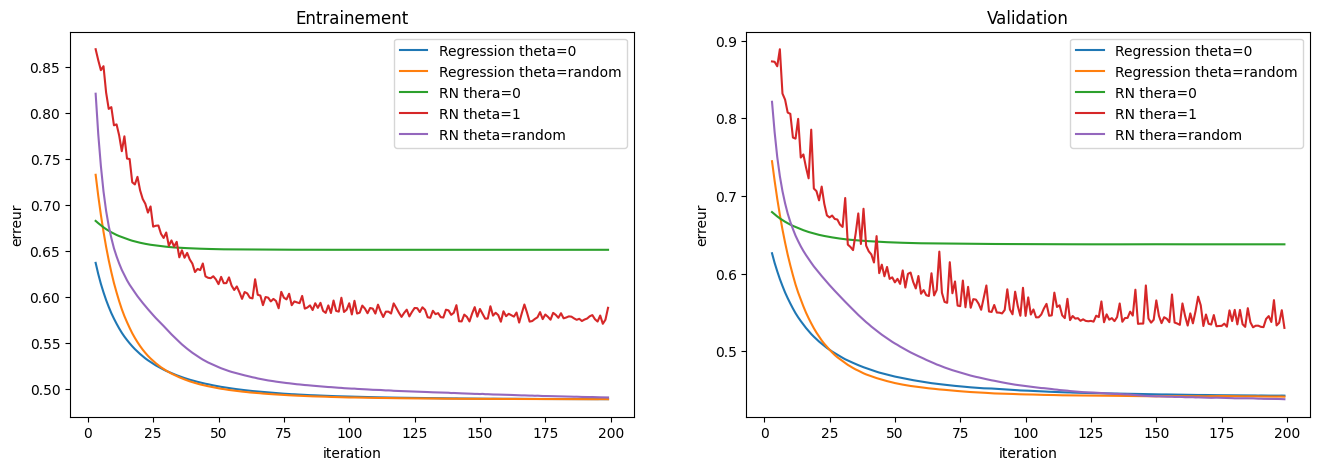

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential, Model

alpha=0.01
NBR_IT = 200

M, N = X_train.shape

reg0 = Sequential()
reg0.add(Dense(1, activation="sigmoid", kernel_initializer='zero', bias_initializer='zeros'))

reg0.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))

print("Training : regression theta=0 ...")
results = reg0.fit(X_trains, Y_train, epochs=NBR_IT, validation_data=(X_tests, Y_test), verbose=0)

regr = Sequential()
regr.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

regr.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))

print("Training : regression theta=random ...")
resultsr = regr.fit(X_trains, Y_train, validation_data=(X_tests, Y_test), epochs=NBR_IT, verbose=0)


reg_m0 = Sequential()
reg_m0.add(Dense(4, activation="relu", kernel_initializer='zero', bias_initializer='zeros'))
reg_m0.add(Dense(2, activation="relu", kernel_initializer='zero', bias_initializer='zeros'))
reg_m0.add(Dense(1, activation="sigmoid", kernel_initializer='zero', bias_initializer='zeros'))

reg_m0.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))

print("Training : RN theta=0 ...")
results_m0 = reg_m0.fit(X_trains, Y_train, validation_data=(X_tests, Y_test), epochs=NBR_IT, verbose=0)

reg_m1 = Sequential()
reg_m1.add(Dense(4, activation="relu", kernel_initializer='one', bias_initializer='one'))
reg_m1.add(Dense(2, activation="relu", kernel_initializer='one', bias_initializer='one'))
reg_m1.add(Dense(1, activation="sigmoid", kernel_initializer='one', bias_initializer='one'))

reg_m1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))

print("Training : RN theta=1 ...")
results_m1 = reg_m1.fit(X_trains, Y_train, validation_data=(X_tests, Y_test), epochs=NBR_IT, verbose=0)


reg_mr = Sequential()
reg_mr.add(Dense(4, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
reg_mr.add(Dense(2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
reg_mr.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

reg_mr.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))

print("Training : RN theta=random ...")
results_mr = reg_mr.fit(X_trains, Y_train, validation_data=(X_tests, Y_test), epochs=NBR_IT, verbose=0)

# the first 3 iterations are not displayed, while the model stabilizes
# otherwise, a model can have a large value compared to the others 
# therefore, we can't visualize the convergence of the others

IT_range = range(NBR_IT)[3:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ax1.title.set_text("Entrainement")
ax1.plot(IT_range, results.history["loss"][3:], label="Regression theta=0")
ax1.plot(IT_range, resultsr.history["loss"][3:], label="Regression theta=random")
ax1.plot(IT_range, results_m0.history["loss"][3:], label="RN thera=0")
ax1.plot(IT_range, results_m1.history["loss"][3:], label="RN theta=1")
ax1.plot(IT_range, results_mr.history["loss"][3:], label="RN theta=random")
ax1.set(xlabel='iteration', ylabel='erreur')
ax1.legend()

ax2.title.set_text("Validation")
ax2.plot(IT_range, results.history["val_loss"][3:], label="Regression theta=0")
ax2.plot(IT_range, resultsr.history["val_loss"][3:], label="Regression theta=random")
ax2.plot(IT_range, results_m0.history["val_loss"][3:], label="RN thera=0")
ax2.plot(IT_range, results_m1.history["val_loss"][3:], label="RN thera=1")
ax2.plot(IT_range, results_mr.history["val_loss"][3:], label="RN thera=random")
ax2.set(xlabel='iteration', ylabel='erreur')
ax2.legend()
plt.show()

Training ...


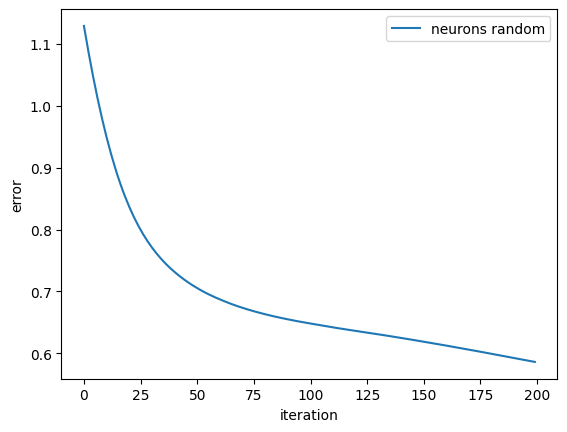

In [18]:
# Another way to do it (manage the loop ourselves)
# This is just for those interested in improving training time
# Training models in a single loop 

alpha=0.1
NBR_IT = 200

M, N = X_train.shape

inputs = Input(shape=(N,), name="digits")

x1 = Dense(4, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')(inputs)
x2 = Dense(2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')(x1)
outputs = Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform', name="predictions")(x2)
model = Model(inputs=inputs, outputs=outputs)


loss=tf.keras.losses.BinaryCrossentropy()
optimizer=tf.keras.optimizers.SGD(learning_rate=alpha)

print("Training ...")
results = reg0.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

hist = []
for epoch in range(NBR_IT):
    with tf.GradientTape() as tape:
        # Logits for this minibatch
        H_train = model(X_trains, training=True)
        # Compute the loss value for this minibatch.
        J_train = loss(Y_train, H_train)
    dJ_train = tape.gradient(J_train, model.trainable_weights)
    optimizer.apply_gradients(zip(dJ_train, model.trainable_weights))
    hist.append(J_train.numpy().mean())
        
plt.plot(range(NBR_IT), hist, label="neurons random")
plt.xlabel("iteration")
plt.ylabel("error")
plt.legend()
plt.show()

**\[Q1\]: Analyze the results**

1. We can easily notice that the classical models (from the last labs) are faster than the neural network models (in terms of iterations and in terms of time). Why is this ? what do you think is the root cause of this ?

2. We observe that **RN0** does not improve (it stagnates from the first iterations). Explain why.
3. We observe that **RN1** is improving compared to **RN0**, but it is rapidly becoming more stagnant compared to **RNR**. Explain why.
4. Noticing the validation, what is the relationship between the number of layers, the complexity of the problem, the number/quality of the data and the learning problems (under/over). Mention all combinations that can cause problems.

[A1:Begin]

**Answer 01**

1. Logistic regression models here are faster than other neural networks because of their simple one layer architecture. They have to compute and optimize less amount of parameters while other models have multiple hidden layers which increases the number of weights and biases that are calculated on forward and backward passes. 
2. When we initialize parameters at zero, all neurons will compute identical value during forward pass and will recieve same gradients backpropogation, which basically restricts model from learning. In our case we use relu and sigmoid activation functions, they return 0 and 0.5 at the 0 which means that neurons will move in the same direction during learning process. The only parameters that are able to properly update are biases, because they are independent from the weights.
3. When we initialized parameters at one it introduces similar problem as in RN0 model. It will restricit model's ability to learn different patterns and features and will move in the same direction. But, we can see that it still performs slightly better than RN0 network, likely because biases and input layer neurons are still able to learn. Input layers will have different values but same as input itself (X) and not zero. RNR model which has random biases and weights will have different values in each neuron and is able to update it properly, allowing it to learn different features and patterns.
4. Introducing many layers in the neural network is justified when we need to learn complex patterns and relationships from the dataset, for easier, for example linearly separable problems, simple architectures like logistic regression are enough and will perform better and faster. Complicated architecture also requires higher quanity of the data so network won't underfit. Low quality data can make complex models learn more noise than neccessary patterns. If complexity of the model is not appropriate it will lead the network to overfit training data which leads to performance during validation process. Similarly if the problem itself is complex, simple network would underfit, because they don't have capacity to capture diverse relations in the dataset. High quality data in general leads to better performance, and lack of it in complex problems will lead to overfitting.


[A1:End]

#### II.2. Activation functions

Here, we want to test the usefulness of the activation functions in the hidden layers and the output layer.
To do this, we trained 5 models and retrieve the training error in each iteration. 
The tested models are :
- **relu->sigmoid** : a Neural Network with **relu** in the hidden layers and **sigmoid** in the output layer.
- **sigmoid->sigmoid** : a Neural Network with **sigmoid** in the hidden layers and **sigmoid** in the output layer.
- **tanh->sigmoid** : a Neural Network with **tanh** in the hidden layers and **sigmoid** in the output layer.
- **sigmoid->relu** : a Neural Network with **sigmoid** in the hidden layers and **relu** n the output layer.
- **relu->relu** : a Neural Network with **relu** in the hidden layers and **relu** in the output layer.

Training elu->sigmoid ...
Training sigmoid->sigmoid...
Training tanh->sigmoid ...
Training sigmoid->relu ...
Training relu->relu ...


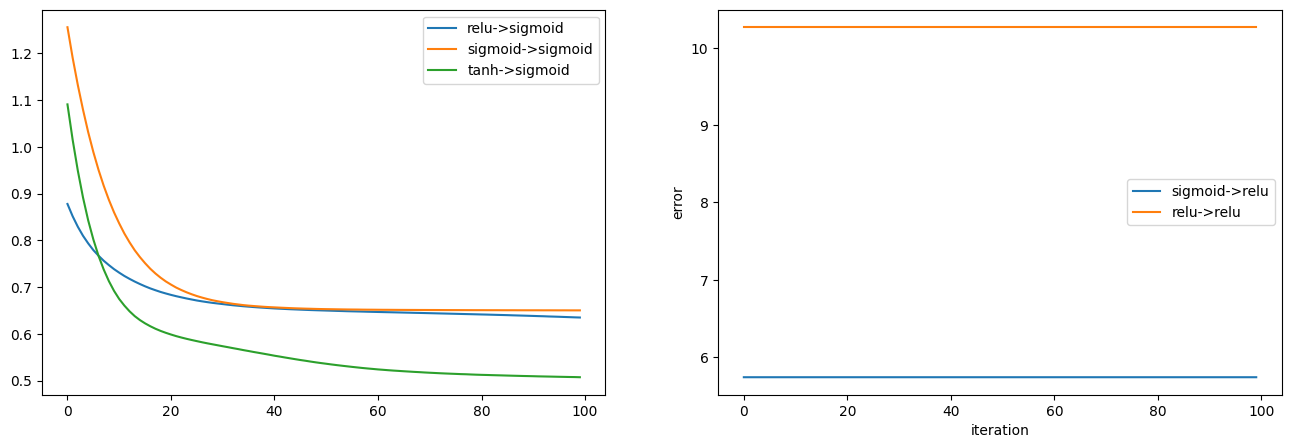

In [19]:
alpha=0.01
NBR_IT = 100

M, N = X_train.shape

L1 = 2
L2 = 2

m1 = Sequential()
m1.add(Dense(L1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m1.add(Dense(L2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m1.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("Training elu->sigmoid ...")
results_m1 = m1.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

m2 = Sequential()
m2.add(Dense(L1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m2.add(Dense(L2, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m2.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("Training sigmoid->sigmoid...")
results_m2 = m2.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

m3 = Sequential()
m3.add(Dense(L1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m3.add(Dense(L2, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m3.add(Dense(1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("Training tanh->sigmoid ...")
results_m3 = m3.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

m4 = Sequential()
m4.add(Dense(L1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m4.add(Dense(L2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m4.add(Dense(1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m4.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("Training sigmoid->relu ...")
results_m4 = m4.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

m5 = Sequential()
m5.add(Dense(L1, activation="tanh", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m5.add(Dense(L2, activation="tanh", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m5.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m5.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("Training relu->relu ...")
results_m5 = m5.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ax1.plot(range(NBR_IT), results_m1.history["loss"], label="relu->sigmoid")
ax1.plot(range(NBR_IT), results_m2.history["loss"], label="sigmoid->sigmoid")
ax1.plot(range(NBR_IT), results_m5.history["loss"], label="tanh->sigmoid")
ax1.legend()
ax2.plot(range(NBR_IT), results_m3.history["loss"], label="sigmoid->relu")
ax2.plot(range(NBR_IT), results_m4.history["loss"], label="relu->relu")
plt.xlabel("iteration")
plt.ylabel("error")
plt.legend()
plt.show()

**\[Q2\]: Analyze the results :**

1. We notice that the **sigmoid->sigmoid** model has stagnated rapidly. Explain how?
2. We notice that the model converges more rapidly (in terms of number of iterations) compared to the two models with **sigmoid** output. Why does this happen?
3. We notice that the models with **relu** are not stable; at each execution, we will have a different diagram (sometimes improvement, sometimes deterioration, etc.). It should be noted that the random initialization is not the source of the problem since there are other similar but stable models. So, why did we have this behavior?

[A2:Begin]

**Answer 02**

1. Sigmoid activation function tends to push very negative values close to zero and very positive values close to one. Because of that gradients will have very small values, making learning process slower and the model to stagnate. It is also known as problem of vanishing gradients.
2. As said before sigmoid function pushes the values close to zero or one. Because of that gradients during backpropogation will be smaller and weaker, especially if we have multiple hidden layers, restricting the model to efficiently update parameters and slowing down convergence. Compared to other activation functions like relu or tahn which tend to keep strong gradients throughout the layers.
3. Relu activation function outputs value it recivied if it is bigger than zero and zero in other cases. In our case where we are trying to solve binary classification problem it is not really sutiable. We are using bce for calculating loss, which expects the input to be in range 0 to 1, while relu might return values exceeding 1. If we are producing large positive values the gradients will explode, leading parameters to drastically change during backpropogation. Also as negative value will produce zero in relu, it can make neurons stop updating because they will receive zero valued gradients.

[A2:End]

#### II.3. Optimization functions

Here, we want to test the different optimization functions.
To do this, we trained 4 models and retrieved the training error in each iteration. 
The tested models are :

- **GD** : a neural network trained with gradient descent optimisation algorithm
- **Adagrad** : a neural network trained with AdaGrad optimisation algorithm
- **RMSprop** : a neural network trained with RMSprop optimisation algorithm
- **Adam** : a neural network trained with Adam optimisation algorithm

Training with gradient descent optimisation algorithm ...
Training with AdaGrad optimisation algorithm...
Training with RMSprop optimisation algorithm ...
Training Adam optimisation algorithm ...


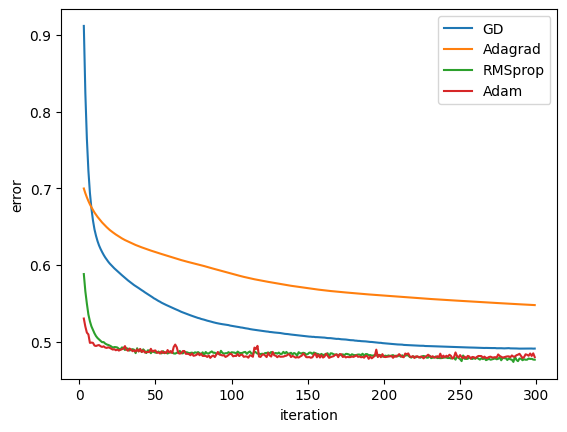

In [30]:
alpha=0.01
NBR_IT = 300

M, N = X_train.shape

L1 = 2
L2 = 2

# Modèle avec Descente du gradient
model_sgd = Sequential()
model_sgd.add(Dense(L1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_sgd.add(Dense(L2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_sgd.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_sgd.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("Training with gradient descent optimisation algorithm ...")
results_sgd = model_sgd.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

# Modèle avec Adaptative gradient 
model_adagrad = Sequential()
model_adagrad.add(Dense(L1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_adagrad.add(Dense(L2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_adagrad.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_adagrad.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=alpha))
print("Training with AdaGrad optimisation algorithm...")
results_adagrad = model_adagrad.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)


# Modèle avec RMSprop
model_rmsprop = Sequential()
model_rmsprop.add(Dense(L1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_rmsprop.add(Dense(L2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_rmsprop.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_rmsprop.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=alpha))
print("Training with RMSprop optimisation algorithm ...")
results_rmsprop = model_rmsprop.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)


# Modèle avec Adam
model_adam = Sequential()
model_adam.add(Dense(L1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_adam.add(Dense(L2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_adam.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_adam.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=alpha))
print("Training Adam optimisation algorithm ...")
results_adam = model_adam.fit(X_trains, Y_train, validation_data=(X_tests, Y_test), epochs=NBR_IT, verbose=0)

# on n'affiche pas les 3 premières itérations, le temps que le modèle se stabilise
# sinon, un modèle peut avoir une grande valeur par rapport aux autres 
# donc, on ne peut pas visualiser la convergence des autres
IT_range = range(NBR_IT)[3:]

plt.plot(IT_range, results_sgd.history["loss"][3:], label="GD")
plt.plot(IT_range, results_adagrad.history["loss"][3:], label="Adagrad")
plt.plot(IT_range, results_rmsprop.history["loss"][3:], label="RMSprop")
plt.plot(IT_range, results_adam.history["loss"][3:], label="Adam")
plt.xlabel("iteration")
plt.ylabel("error")
plt.legend()
plt.show()

**\[Q3\]: Analyze the results:**

- We notice that the **GD** model converges faster than **AdaGrad**. Why is this?
- Why does **RMSprop** converge faster than **AdaGrad**, yet their equations are almost similar? (here, you have to explain the contribution in the equation of the first one compared to the second)
- When we run it several times, we notice that Adam is more stable. Why is this?

[A3:Begin]

**Answer 03**

1. GD uses a constant learning rate, which makes the model to take steps of the same size throughout training. This allowed GD in our case to keep making steady progress and converge faster. While AdaGrad adapts its learning rate based on the past gradients. This helps it to adapt individual parameters more flexibly. But after certain amount of iterations, AdaGrad accumulates large sum of squared gradients, and this can cause the learning rate to shrink too much, slowing down the convergence.
2. RMSprop converges faster by addressing the main limitation of AdaGrad. Instead of considering all past gradients equally, RMSprop gives more weight to recent gradients using decay factor, preventing learning rate from shrinking too much.
3. Adam is more stable by combining momentum and adaptive learning rate techniques. Momentum smooths out gradient updates by averaging past gradients, preventing back-and-forth movement around convergence point. Adam also adapts the learning rate for each parameter, preventing it from shrinking too much. Additionally, bias correction improves stability by adjusting the initial estimates of the gradients, especially early in training when the moving averages are biased toward zero. Without bias correction, the optimizer would make overly cautious updates in the early stages, slowing down convergence.

[A3:End]

## III. Improvement of a model : Classifying MNIST Dataset


- We will use the MNIST dataset. 
- Here, we use only 100 samples for training (10 for each digit) and 30 for validation (3 for each digit). 
- So, the model will not be powerful; it is just to build some applications in image processing.
- The dataset contains 28*28 pixels images representing manually written digits. Each pixel is a number between 0 and 255.

(100, 28, 28, 1)
(30, 28, 28, 1)


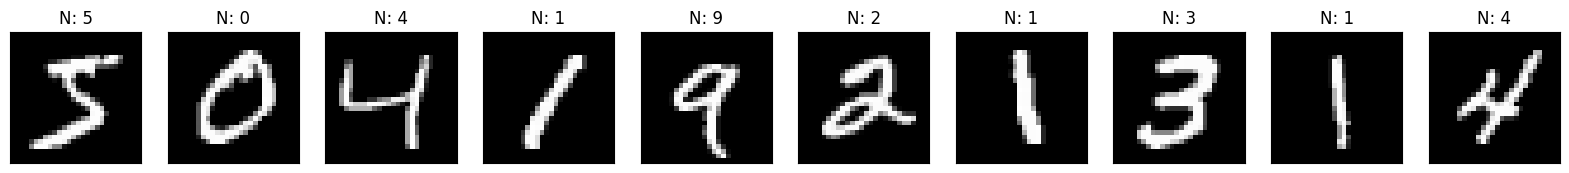

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, UpSampling2D
from tensorflow.keras.models import Sequential, Model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# The following two instructions will download the whole dataset
# mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

train = pd.read_csv("datasets/mnist_train.csv")
test = pd.read_csv("datasets/mnist_test.csv")

x_train = train.iloc[:, :-1].values # First columns 
y_train = train.iloc[:,-1].values   # last column
x_test = test.iloc[:, :-1].values   # First columns 
y_test = test.iloc[:,-1].values     # Last column 

x_train = np.reshape(x_train, [-1, 28, 28, 1])
x_test = np.reshape(x_test, [-1, 28, 28, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    plt.title("N: " + str(y_train[i]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Classification of the numbers in the MNIST dataset

Here we try to train a model that recognizes the numbers from 0 to 9. 
There are two models: 
- In the first cell, it is a basic model
- In the second cell, it is a model identical to the first one. Except, you have to change it by adding layers: Dropout, MaxPooling2D, etc. 

NB ; The second model should be an improvement. You have to discuss how you improved it, i.e. if you added another layer, why?

/Users/azamat/CodeProjects/cps2/up7 machine learning/session-5/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training ...
Evaluation ...


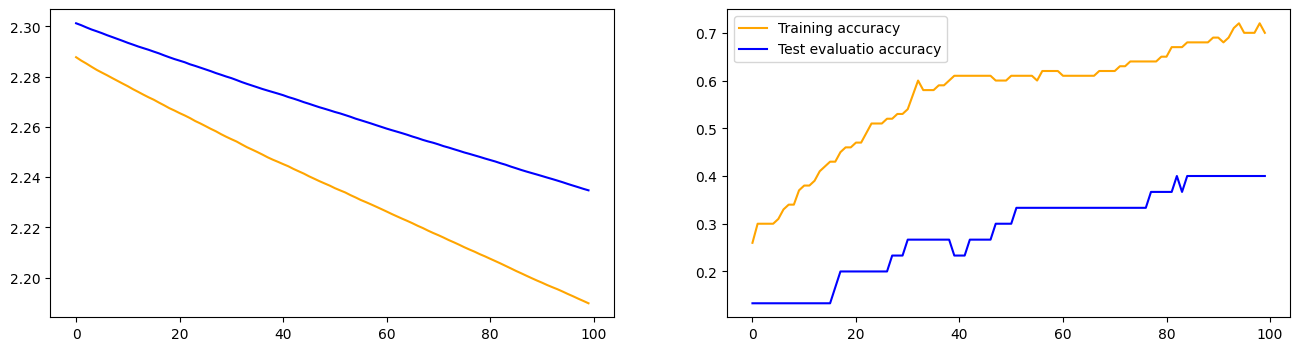

In [50]:
NBR_IT = 100
epochs = range(NBR_IT)

input_shape = (28, 28, 1)

detect_basic = Sequential()
detect_basic.add(Dense(128, activation="relu", input_shape=input_shape))
detect_basic.add(Flatten())
detect_basic.add(Dense(10, activation="softmax"))

detect_basic.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adadelta(),
    metrics=["accuracy"])

print("Training ...")
results = detect_basic.fit(x_train, y_train_onehot, epochs=NBR_IT, validation_data=(x_test, y_test_onehot), verbose=0)

# uncomment the following for evaluation
print("Evaluation ...")
score = detect_basic.evaluate(x_test, y_test_onehot, verbose=0)

history = results.history
couts_train = history["loss"]
couts_test = history["val_loss"]
accuracy_train = history["accuracy"]
accuracy_test = history["val_accuracy"]
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
ax[0].plot(epochs, couts_train, color="orange", label="Training cost")
ax[0].plot(epochs, couts_test, color="blue", label="Test evaluation Cost")
ax[1].plot(epochs, accuracy_train, color="orange", label="Training accuracy")
ax[1].plot(epochs, accuracy_test, color="blue", label="Test evaluatio accuracy")
plt.legend()
plt.show()

Training ...
evaluation ...


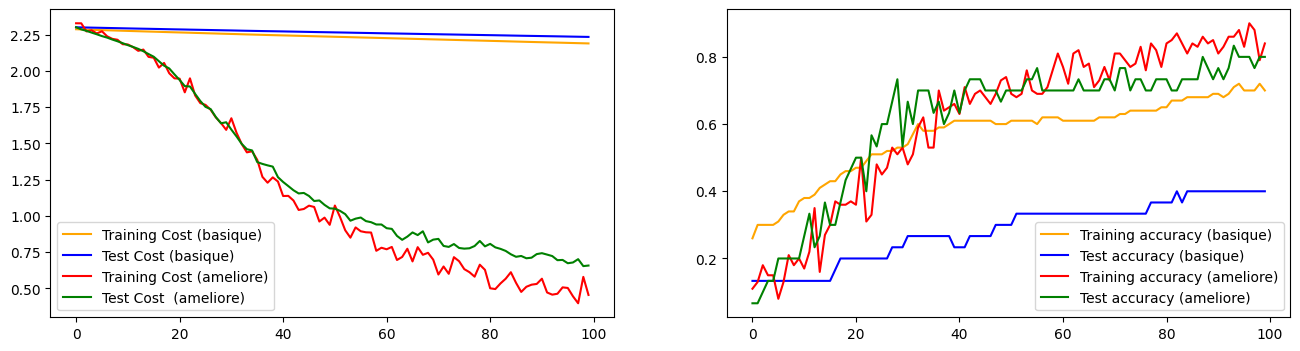

In [132]:
# TODO improve the classification model (CNN)
# =============== Modifier ici ===================
detect_good = Sequential()

detect_good.add(Conv2D(16, kernel_size=(5, 5), activation="relu", input_shape=input_shape))
detect_good.add(AveragePooling2D(pool_size=(2, 2)))
detect_good.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
detect_good.add(MaxPooling2D(pool_size=(2, 2)))
detect_good.add(Flatten())
detect_good.add(Dropout(0.2))
detect_good.add(Dense(128, activation="relu"))
detect_good.add(Dropout(0.5))
detect_good.add(Dense(10, activation="softmax"))

detect_good.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.2),
    metrics=["accuracy"])
# =============== Fin modification ================


print("Training ...")
results = detect_good.fit(x_train, y_train_onehot, epochs=NBR_IT, validation_data=(x_test, y_test_onehot), verbose=0)
print("evaluation ...")
score = detect_basic.evaluate(x_test, y_test_onehot, verbose=0)

history = results.history

couts_train2 = history["loss"]
couts_test2 = history["val_loss"]
accuracy_train2 = history["accuracy"]
accuracy_test2 = history["val_accuracy"]
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
ax[0].plot(epochs, couts_train, color="orange", label="Training Cost (basique)")
ax[0].plot(epochs, couts_test, color="blue", label="Test Cost (basique)")
ax[0].plot(epochs, couts_train2, color="red", label="Training Cost (ameliore)")
ax[0].plot(epochs, couts_test2, color="green", label="Test Cost  (ameliore)")
ax[0].legend()
ax[1].plot(epochs, accuracy_train, color="orange", label="Training accuracy (basique)")
ax[1].plot(epochs, accuracy_test, color="blue", label="Test accuracy (basique)")
ax[1].plot(epochs, accuracy_train2, color="red", label="Training accuracy (ameliore)")
ax[1].plot(epochs, accuracy_test2, color="green", label="Test accuracy (ameliore)")
ax[1].legend()
plt.show()

**Question 4**:

The second model should be an improvement. You have to discuss how you improved it, i.e. if you added another layer, why? what layer you add ? how did you choose wich layer to stack in your Neural Net archotecture ?

[A4:Begin]

**Discussion 04:**

1. For image recognition tasks like this, convolutional layers are default choice to extract features from the data. I started with two convolutional layers. Adding more led to overfitting, given the limited dataset, so i had to keep the complexity of the network accordingly. I chose a 5x5 kernel for the first convolutional layer to allow the model to capture larger patterns and features. For the second layer, I used a 3x3 kernel, which is a common choice in cnns and helps the model learn more detailed features.
2. After the first convolution, i applied 2x2 average pooling, with idea being to smooth the features and reduce dimensions. After the second convolution, I added 2x2 max pooling to also reduce the feature maps size and to keep important information. These pool sizes are widely accepted standard.
3. The flatten layer is necessary to convert the 2d feature maps from the convolutional layers into a 1d vector, which is required before passing data to the dense layer.
4. To address the large gap between training and validation performance, i added dropout layers to reduce overfitting. After flattening, i added a dropout layer with a rate of 0.2 to allow for some regularization without losing too many features. And another dropout layer with a higher rate of 0.5 after the dense layer, as they tend to overfit more easily.
5. The default base learning rate in TensorFlow is 1, which caused instability in the model. I experimented with different learning rates, starting at 0.1 and slowly increasing it. I found that 0.2 was most optimal choice, outside of which the model would behave unstably.

[A4:End]